In [498]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Funciones

In [499]:
def line(x, a, b):
    return a*x + b

def coulomb(x,a,b):
    return a/(x**2) + b

def coulomb2(x,a,n,b):
    return a/(x**n) + b

# Lectura de datos

In [500]:
names = ["Openbeam"]
dsOb = [35,70,176]
Vs = [40,50,60]
dfs = []

for name in names:
    for d in dsOb:
        for V in Vs:
            df = pd.read_csv('Datos_dosis_nomex_HEPlabUniandes - {0}_d{1}cm_{2}kVp.csv'.format(name,d,V))
            del df['D']
            df["d"] = d
            df["V"] = V
            df["Measure"] = name
            df['Dmean'] = df['Dmean'].apply(lambda x: x.replace(',', '.')).astype('float')
            df['Dstd'] = df['Dstd'].apply(lambda x: x.replace(',', '.')).astype('float')
            df = df.drop_duplicates(keep="first")
            dfs.append(df)

names = ["Rejilla"]
dsR = [90,110,120,130]
Vs = [40,50,60]

for name in names:
    for d in dsR:
        for V in Vs:
            df = pd.read_csv('Datos_dosis_nomex_HEPlabUniandes - {0}_d{1}cm_{2}kVp.csv'.format(name,d,V))
            del df['D']
            df["d"] = d
            df["V"] = V
            df["Measure"] = name
            df['Dmean'] = df['Dmean'].apply(lambda x: x.replace(',', '.')).astype('float')
            df['Dstd'] = df['Dstd'].apply(lambda x: x.replace(',', '.')).astype('float')
            df = df.drop_duplicates(keep="first")
            dfs.append(df)


In [501]:
dfs[2]

,I,Dmean,Dstd,d,V,Measure
0,10,9.6036,0.131753,35,60,Openbeam
5,13,23.5000,0.107703,35,60,Openbeam
10,15,32.7940,0.035777,35,60,Openbeam
15,20,55.8820,0.032711,35,60,Openbeam
20,25,79.1400,0.046368,35,60,Openbeam
25,28,92.9820,0.068337,35,60,Openbeam
30,30,102.2200,0.044721,35,60,Openbeam


In [502]:
df1_I = np.array([10,15,20,25,30,35,40])
df1_Dmean = 3.817*df1_I - 38.167
df1_Dstd = np.zeros(7)
df1_d = 35*np.ones(7).astype(int)
df1_V = 50*np.ones(7).astype(int)
df1_measure = np.array(["Openbeam","Openbeam","Openbeam","Openbeam","Openbeam","Openbeam","Openbeam"])


df1 = pd.DataFrame([df1_I, df1_Dmean, df1_Dstd, df1_d, df1_V, df1_measure])
df1 = df1.T
df1.columns = ["I", "Dmean", "Dstd", "d", "V", "Measure"]
df1["d"] = df1["d"].astype(int)
df1["V"] = df1["V"].astype(int)

df2_I = np.array([10,15,20,25,30,35,40])
df2_Dmean = 4.632*df2_I - 36.708
df2_Dstd = np.zeros(7)
df2_d = 35*np.ones(7).astype(int)
df2_V = 60*np.ones(7).astype(int)
df2_measure = np.array(["Openbeam","Openbeam","Openbeam","Openbeam","Openbeam","Openbeam","Openbeam"])


df2 = pd.DataFrame([df2_I, df2_Dmean, df2_Dstd, df2_d, df2_V, df2_measure])
df2 = df2.T
df2.columns = ["I", "Dmean", "Dstd", "d", "V", "Measure"]
df2["d"] = df2["d"].astype(int)
df2["V"] = df2["V"].astype(int)

dfs[1] = df1
dfs[2] = df2

In [503]:
dfs[2]

,I,Dmean,Dstd,d,V,Measure
0,10,9.612,0.0,35,60,Openbeam
1,15,32.772,0.0,35,60,Openbeam
2,20,55.932,0.0,35,60,Openbeam
3,25,79.092,0.0,35,60,Openbeam
4,30,102.252,0.0,35,60,Openbeam
5,35,125.412,0.0,35,60,Openbeam
6,40,148.572,0.0,35,60,Openbeam


# Unir todos los dataframes

In [504]:
dt_tot = pd.concat(dfs, ignore_index=True, axis=0)

dt_tot

,I,Dmean,Dstd,d,V,Measure
0,10,2.734,0.044317,35,40,Openbeam
1,15,17.14,0.071764,35,40,Openbeam
2,20,31.448,0.072938,35,40,Openbeam
3,25,45.93,0.059582,35,40,Openbeam
4,30,60.278,0.036332,35,40,Openbeam
...,...,...,...,...,...,...
142,20,1.015,0.014464,130,60,Rejilla
143,25,1.268,0.008764,130,60,Rejilla
144,30,1.5,0.018995,130,60,Rejilla
145,35,1.734,0.009695,130,60,Rejilla


In [505]:
dt_tot.dtypes

I          object
Dmean      object
Dstd       object
d           int64
V           int64
Measure    object
dtype: object

# Gráfica de dosis vs corriente (a voltajes y distancias fijas)

## Open beam

In [506]:
df_DvsIOb = []

for d in dsOb:
    for V in Vs:
        df = dt_tot.loc[(dt_tot["Measure"] == "Openbeam") & (dt_tot["V"] == V) & (dt_tot["d"] == d), ["I", "Dmean", "Dstd"]]
        df_DvsIOb.append([df, d, V])

In [507]:
df_DvsIOb[0][0]

,I,Dmean,Dstd
0,10,2.734,0.044317
1,15,17.14,0.071764
2,20,31.448,0.072938
3,25,45.93,0.059582
4,30,60.278,0.036332
5,35,74.59,0.03937
6,40,86.122,0.069065


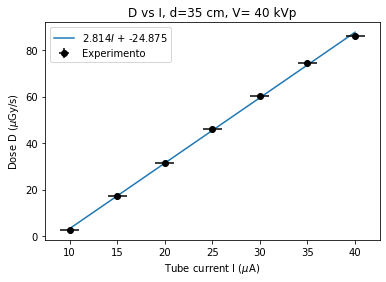

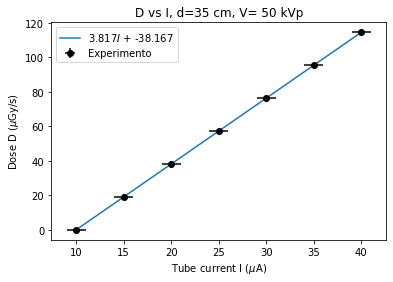

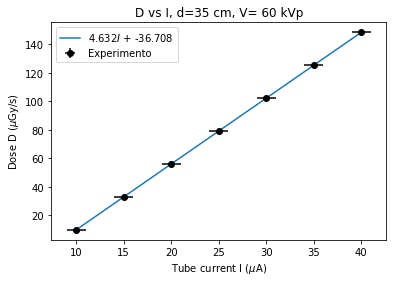

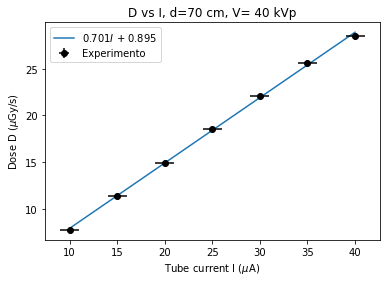

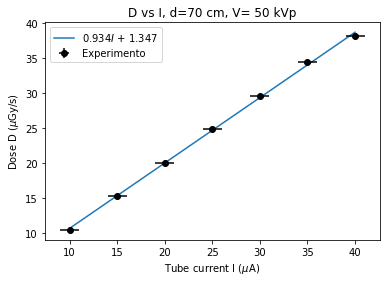

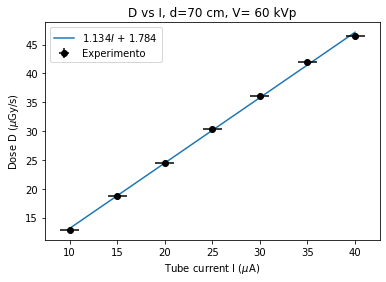

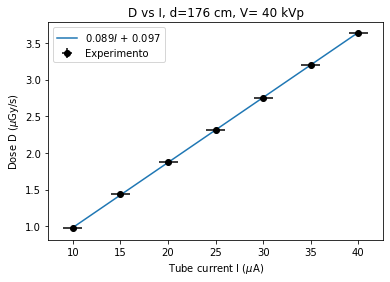

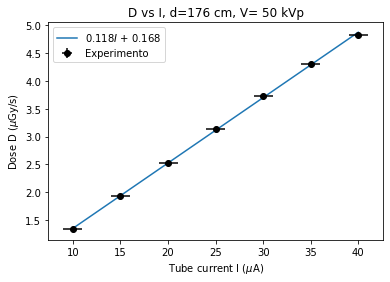

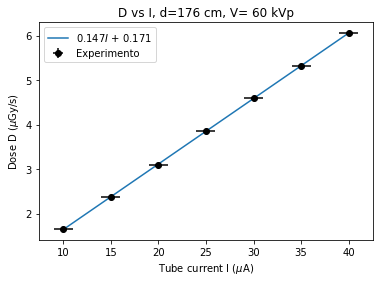

In [508]:
for elem in df_DvsIOb:
    df = elem[0].to_numpy()
    d = elem[1]
    V = elem[2]
    I = df[:,0]
    D = df[:,1]
    Derr = df[:,2]
    In = np.linspace(np.amin(I), np.amax(I), 1000)
    popt, pcov = curve_fit(line, I, D)
    plt.figure()
    plt.plot(In, line(In,*popt), label=r"{0}$I$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.errorbar(I, D, xerr=1 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Tube current I ($\mu$A)")
    plt.ylabel(r"Dose D ($\mu$Gy/s)")
    plt.title("D vs I, d={0} cm, V= {1} kVp".format(d,V))
    plt.legend()

## Rejilla

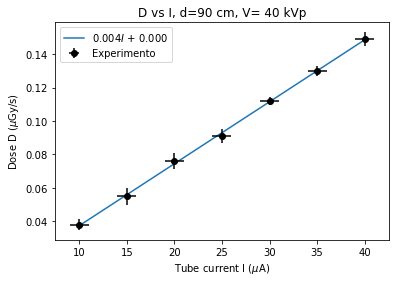

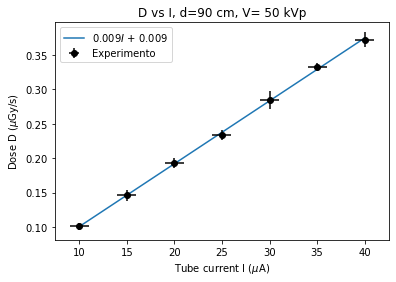

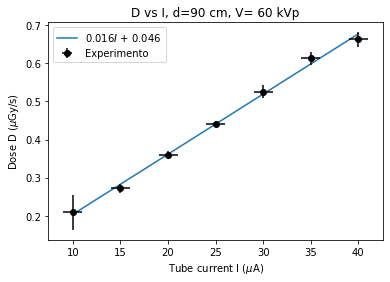

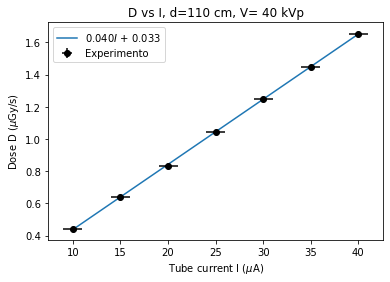

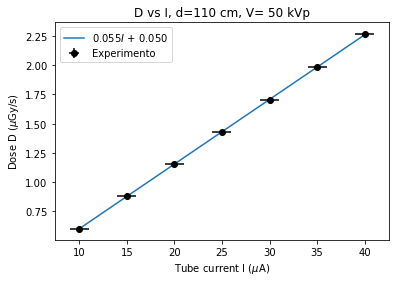

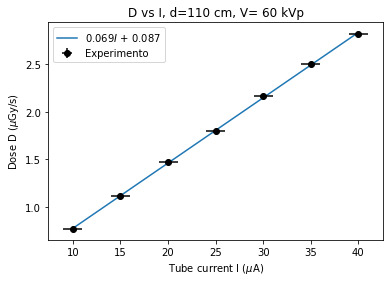

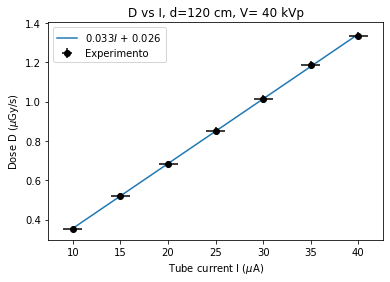

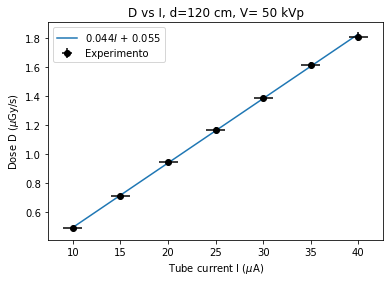

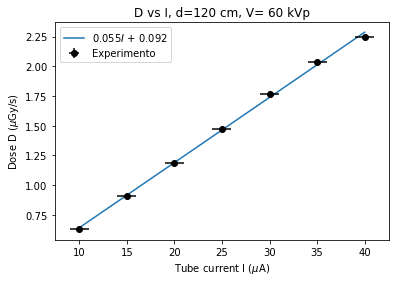

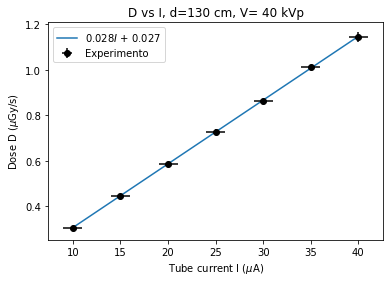

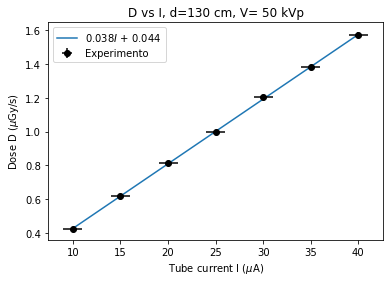

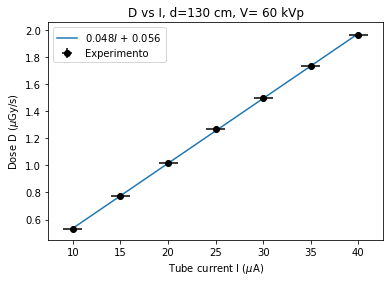

In [509]:
df_DvsIR = []

for d in dsR:
    for V in Vs:
        df = dt_tot.loc[(dt_tot["Measure"] == "Rejilla") & (dt_tot["V"] == V) & (dt_tot["d"] == d), ["I", "Dmean", "Dstd"]]
        df_DvsIR.append([df, d, V])

for elem in df_DvsIR:
    df = elem[0].to_numpy()
    d = elem[1]
    V = elem[2]
    I = df[:,0]
    D = df[:,1]
    Derr = df[:,2]
    In = np.linspace(np.amin(I), np.amax(I), 1000)
    popt, pcov = curve_fit(line, I, D)
    plt.figure()
    plt.plot(In, line(In,*popt), label=r"{0}$I$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.errorbar(I, D, xerr=1 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Tube current I ($\mu$A)")
    plt.ylabel(r"Dose D ($\mu$Gy/s)")
    plt.title("D vs I, d={0} cm, V= {1} kVp".format(d,V))
    plt.legend()

# Gráfica de dosis vs distancia (a voltajes y corrientes fijas)

## Open Beam

In [510]:
df_DvsdOb = []
I = [10,15,20,25,30,35,40]

for i in I:
    for V in Vs:
        df = dt_tot.loc[(dt_tot["Measure"] == "Openbeam") & (dt_tot["V"] == V) & (dt_tot["I"] == i), ["Dmean", "d","Dstd"]]
        df_DvsdOb.append([df, V, i])

In [511]:
df_DvsdOb[0][0]

,Dmean,d,Dstd
0,2.734,35,0.044317
21,7.7504,70,0.025784
42,0.9704,176,0.020611


### Ajustando con $\frac{a}{d^2} + b$

C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3208705522.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


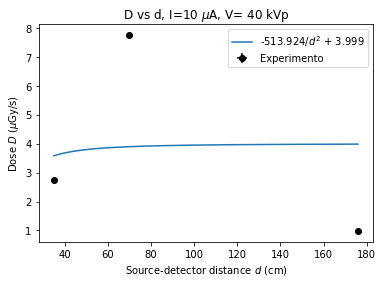

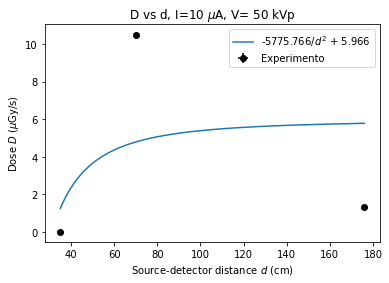

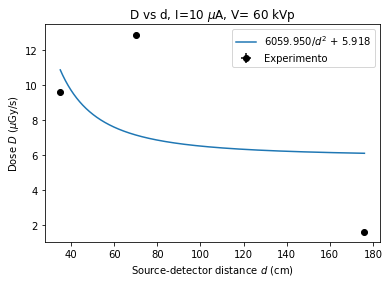

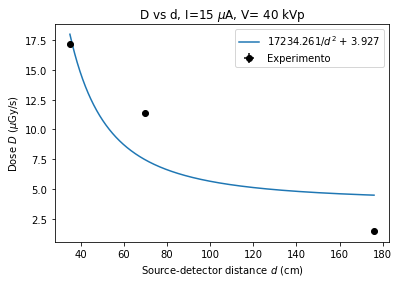

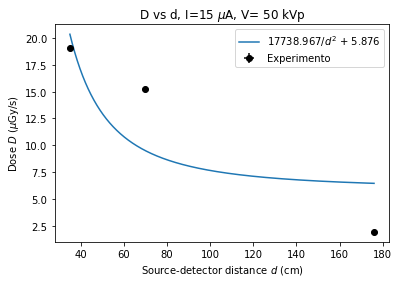

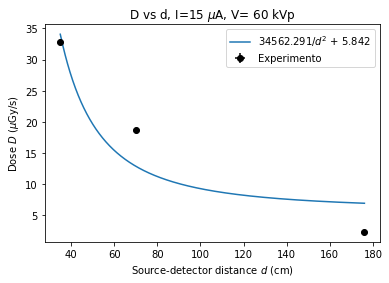

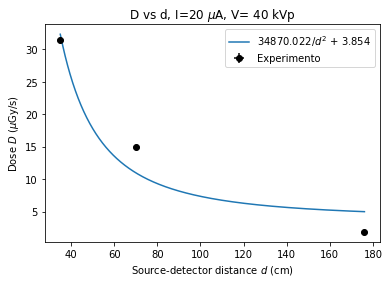

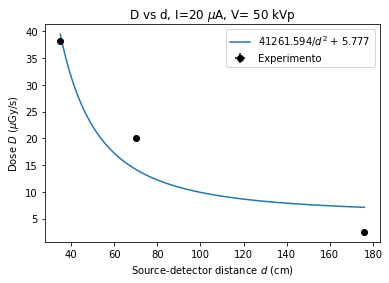

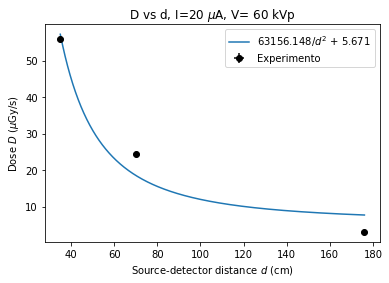

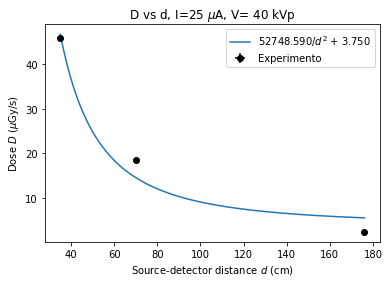

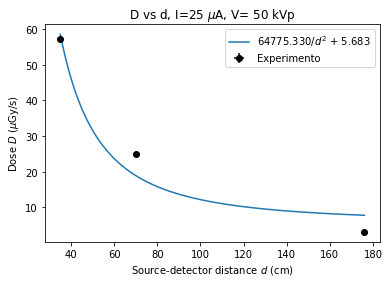

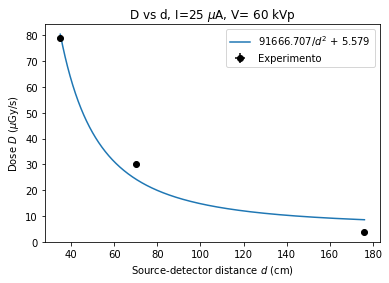

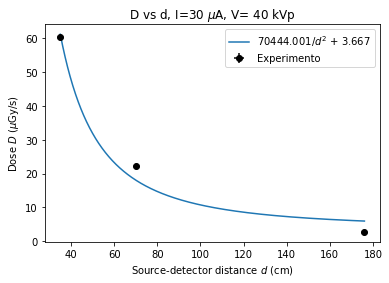

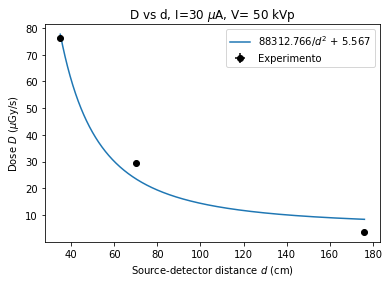

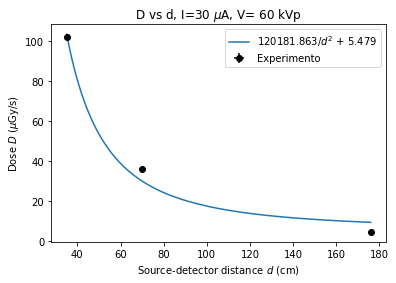

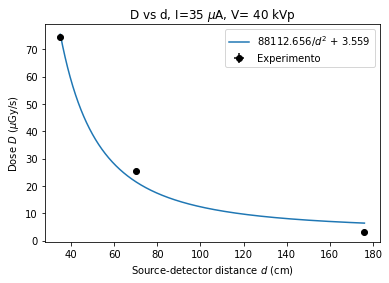

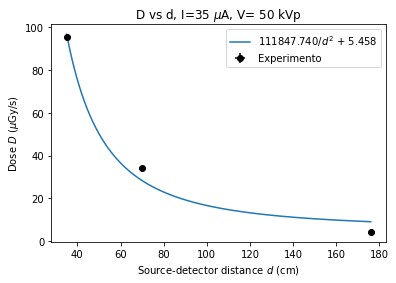

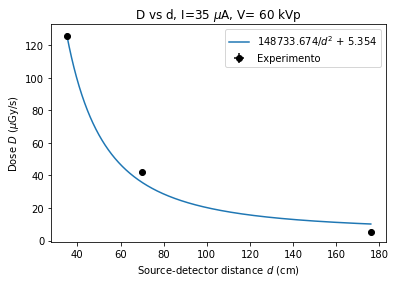

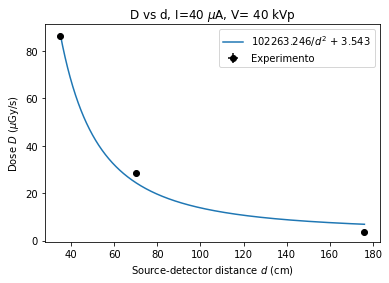

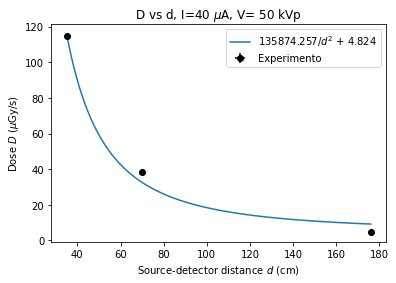

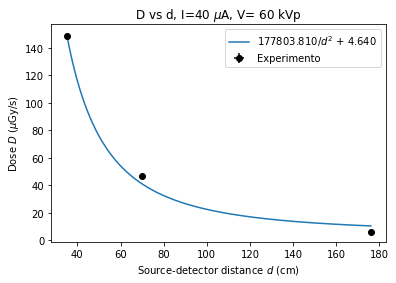

In [512]:
for elem in df_DvsdOb:
    df = elem[0].to_numpy()
    V = elem[1]
    Ii = elem[2]
    D = df[:,0]
    d = df[:,1]
    Derr = df[:,2]
    dn = np.linspace(np.amin(d), np.amax(d), 1000)
    popt, pcov = curve_fit(coulomb, d, D, maxfev=5000)
    plt.figure()
    plt.plot(dn, coulomb(dn,*popt), label=r"{0}/$d^2$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.errorbar(d, D, xerr=0.05 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Source-detector distance $d$ (cm)")
    plt.ylabel(r"Dose $D$ ($\mu$Gy/s)")
    plt.title(r"D vs d, I={0} $\mu$A, V= {1} kVp".format(Ii,V))
    plt.legend()

### Ajustando con $\frac{a}{d^n} + b$ 

C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3691178616.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return a/(x**n) + b
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3691178616.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return a/(x**n) + b
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3691178616.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return a/(x**n) + b
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the paramet

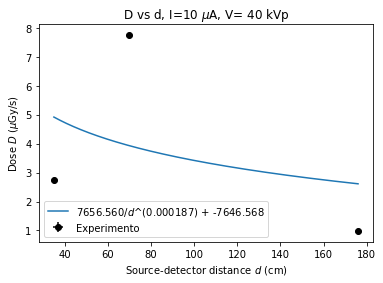

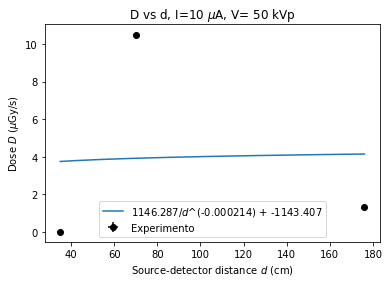

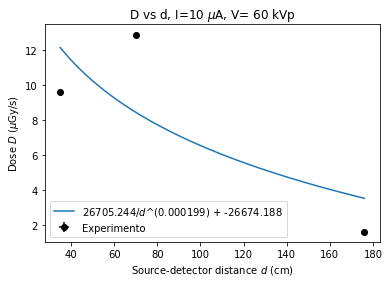

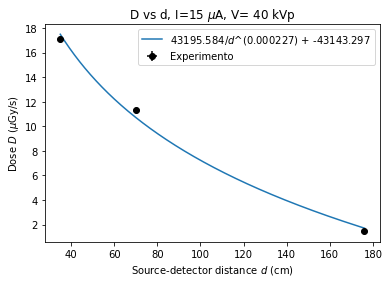

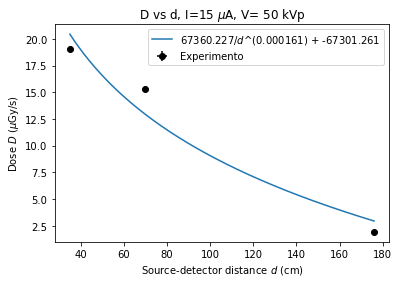

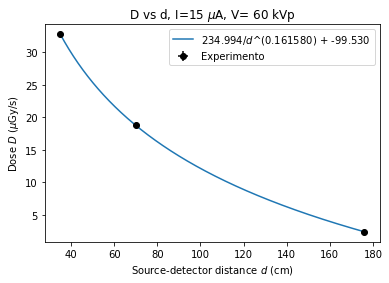

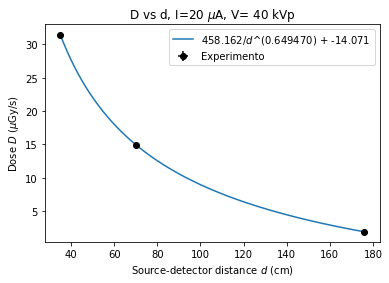

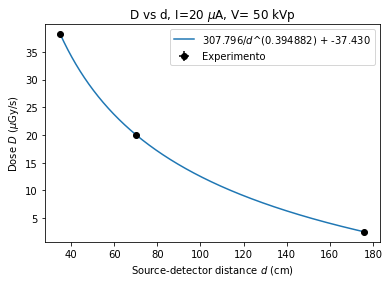

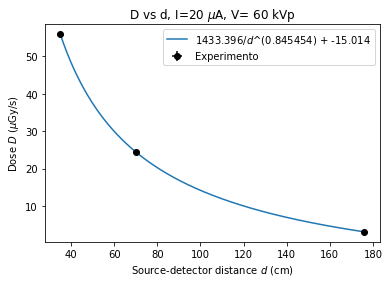

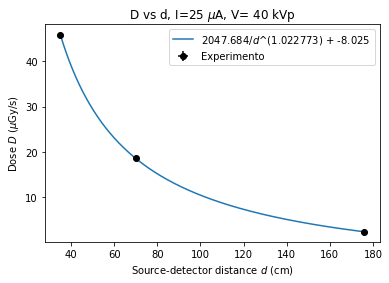

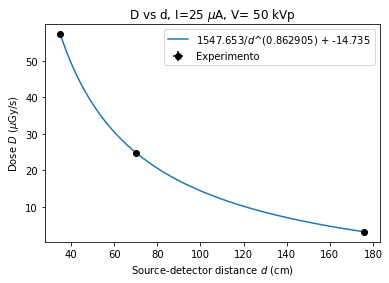

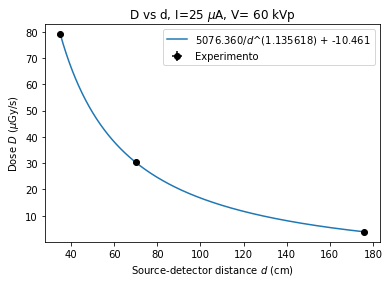

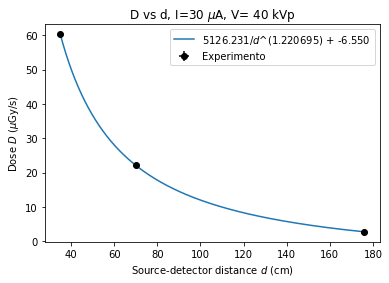

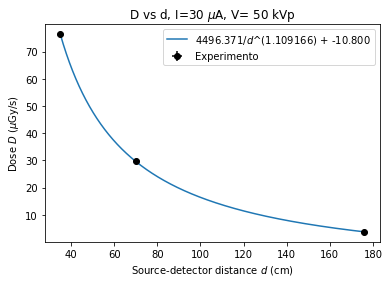

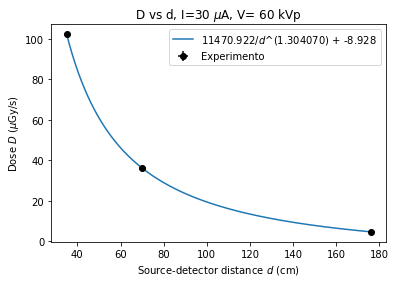

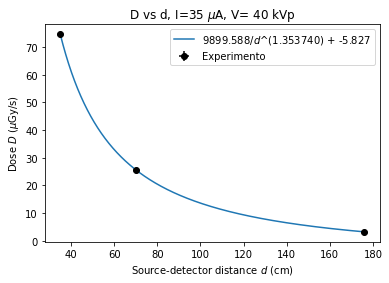

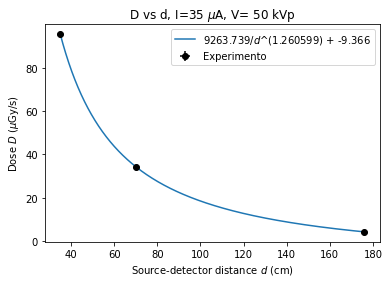

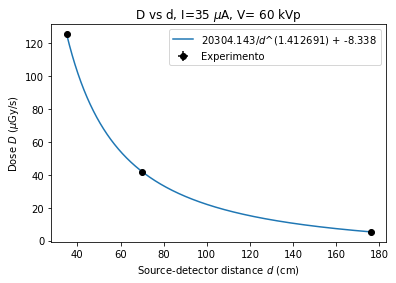

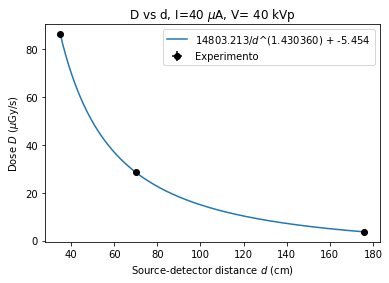

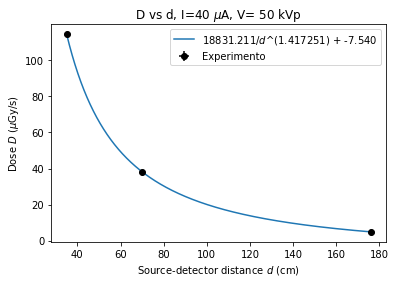

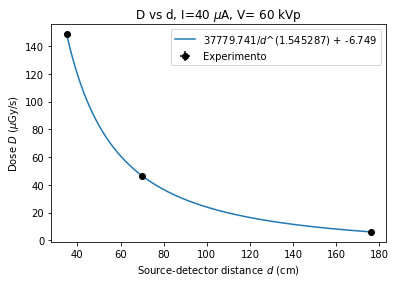

In [513]:
for elem in df_DvsdOb:
    df = elem[0].to_numpy()
    V = elem[1]
    Ii = elem[2]
    D = df[:,0]
    d = df[:,1]
    Derr = df[:,2]
    dn = np.linspace(np.amin(d), np.amax(d), 1000)
    popt, pcov = curve_fit(coulomb2, d, D, maxfev=5000)
    plt.figure()
    #plt.plot(dn, coulomb(dn,*popt), label=r"{0}/$d^2$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.plot(dn, coulomb2(dn,*popt), label=r"{0}/$d$^({1}) + {2}".format( "{:.3f}".format(popt[0]), "{:.6f}".format(popt[1]), "{:.3f}".format(popt[2]) ) )
    plt.errorbar(d, D, xerr=0.05 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Source-detector distance $d$ (cm)")
    plt.ylabel(r"Dose $D$ ($\mu$Gy/s)")
    plt.title(r"D vs d, I={0} $\mu$A, V= {1} kVp".format(Ii,V))
    plt.legend()

## Rejilla

In [519]:
df_DvsdR = []
I = [10,15,20,25,30,35,40]

for i in I:
    for V in Vs:
        df = dt_tot.loc[(dt_tot["Measure"] == "Rejilla") & (dt_tot["V"] == V) & (dt_tot["I"] == i), ["Dmean", "d","Dstd"]]
        df = df.loc[df["d"] > 90]
        df_DvsdR.append([df, V, i])

### Ajustando con $\frac{a}{d^2} + b$

C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3160930861.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


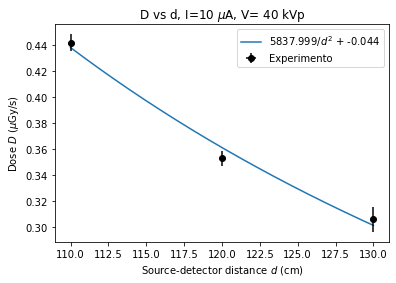

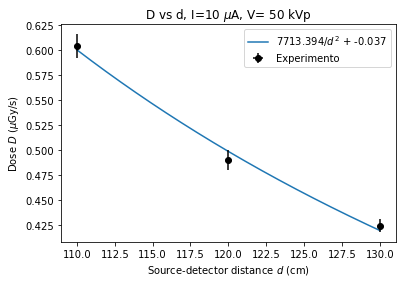

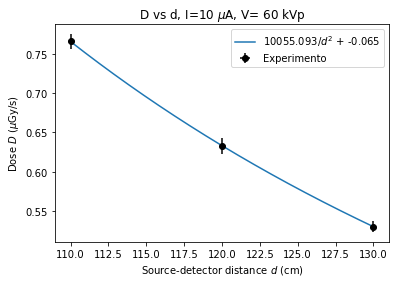

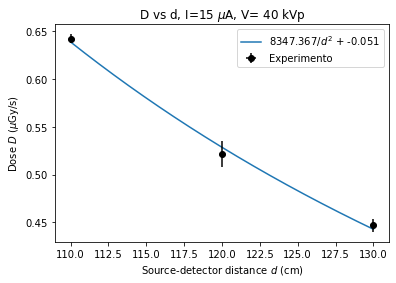

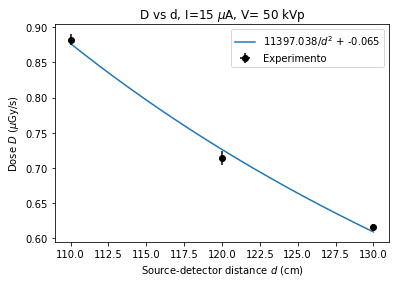

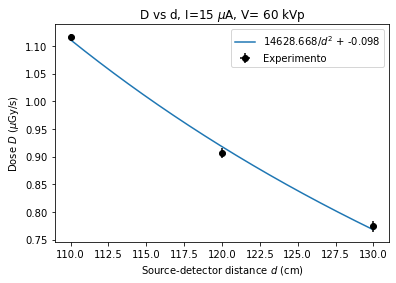

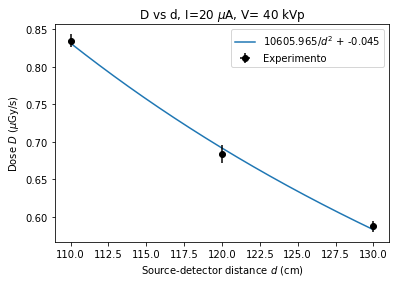

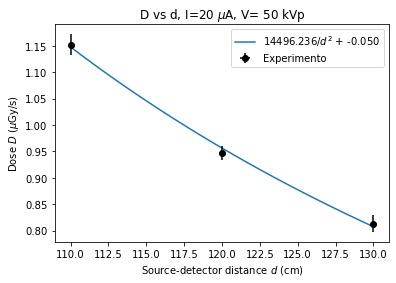

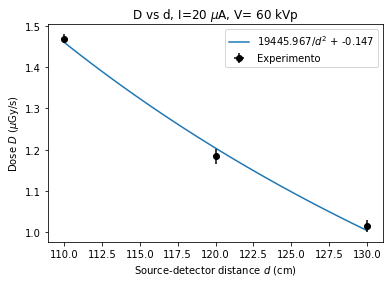

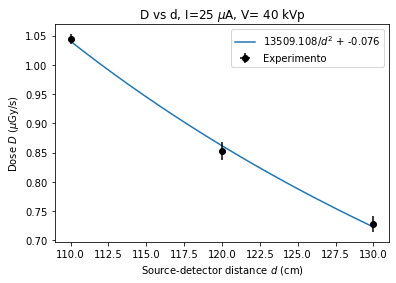

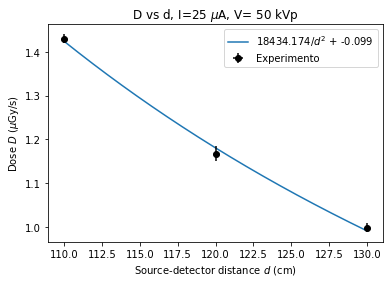

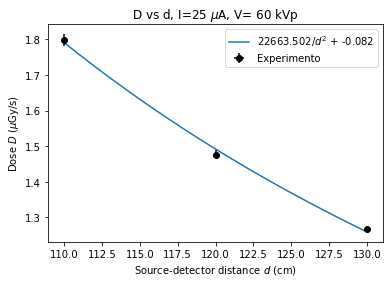

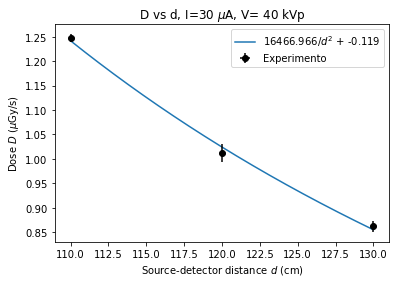

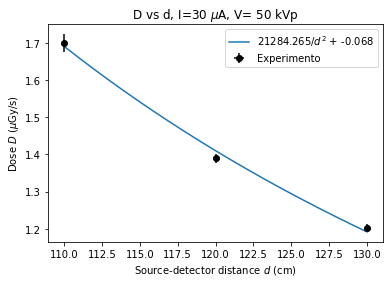

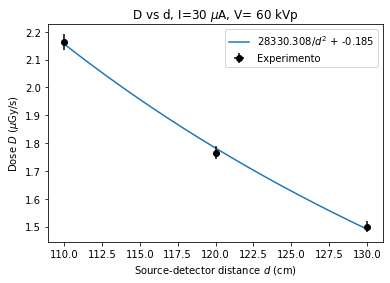

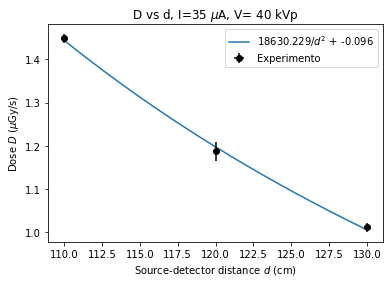

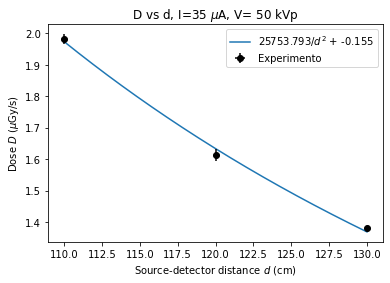

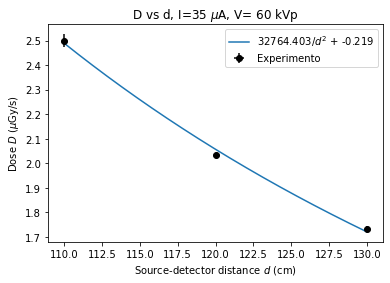

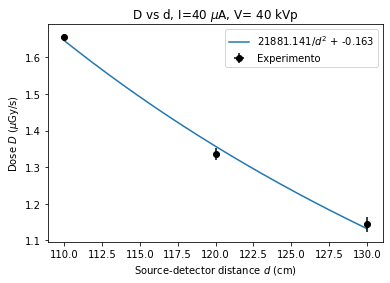

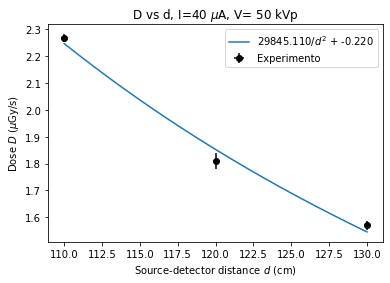

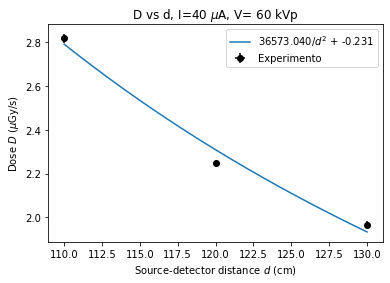

In [520]:
for elem in df_DvsdR:
    df = elem[0].to_numpy()
    V = elem[1]
    Ii = elem[2]
    D = df[:,0]
    d = df[:,1]
    Derr = df[:,2]
    dn = np.linspace(np.amin(d), np.amax(d), 1000)
    popt, pcov = curve_fit(coulomb, d, D, maxfev=5000)
    plt.figure()
    plt.plot(dn, coulomb(dn,*popt), label=r"{0}/$d^2$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.errorbar(d, D, xerr=0.05 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Source-detector distance $d$ (cm)")
    plt.ylabel(r"Dose $D$ ($\mu$Gy/s)")
    plt.title(r"D vs d, I={0} $\mu$A, V= {1} kVp".format(Ii,V))
    plt.legend()

### Ajustando con $\frac{a}{d^n} + b$

C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3691178616.py:8: RuntimeWarning: overflow encountered in power
  return a/(x**n) + b
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3691178616.py:8: RuntimeWarning: overflow encountered in power
  return a/(x**n) + b
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\3691178616.py:8: RuntimeWarning: overflow encountered in power
  return a/(x**n) + b
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

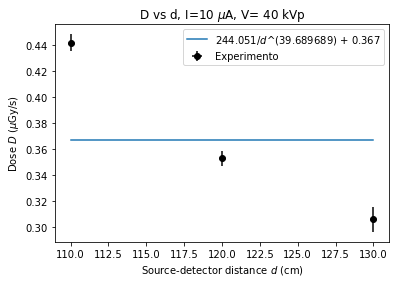

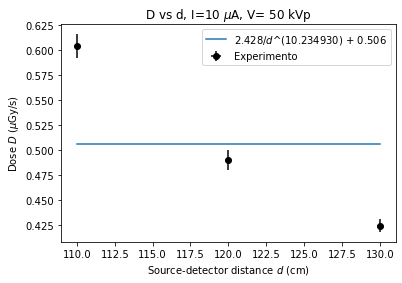

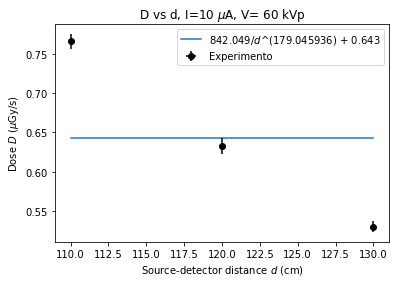

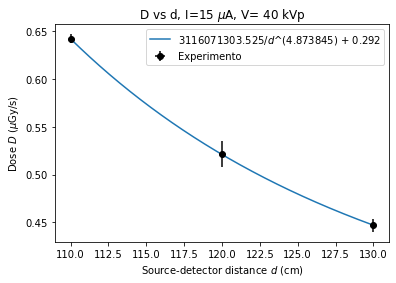

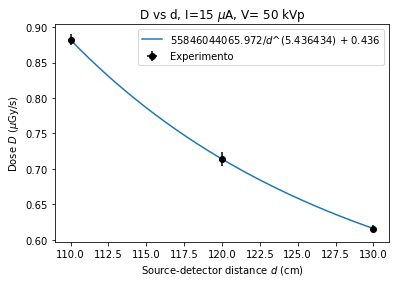

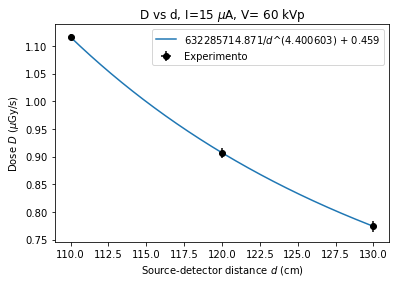

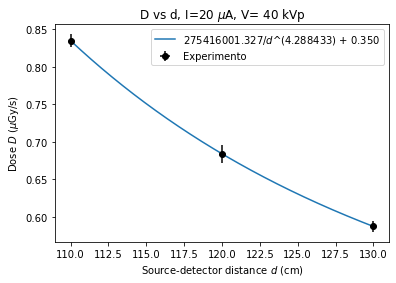

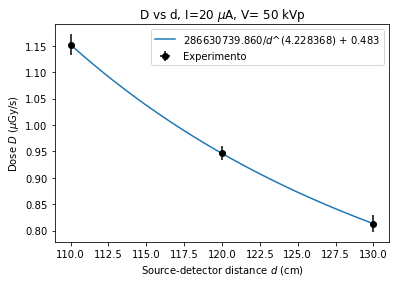

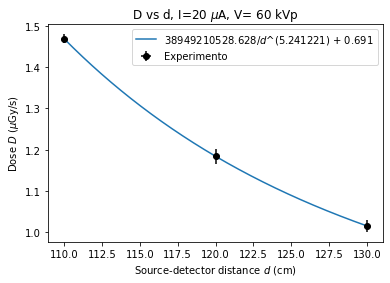

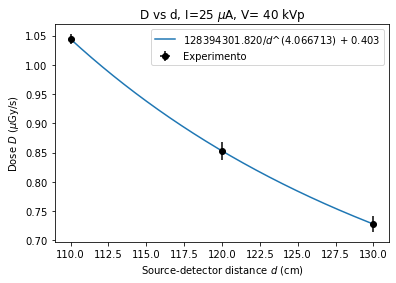

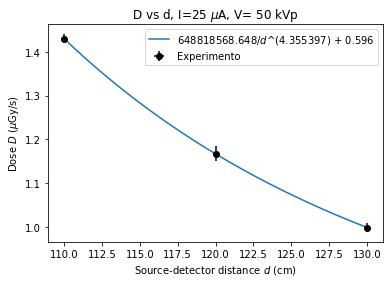

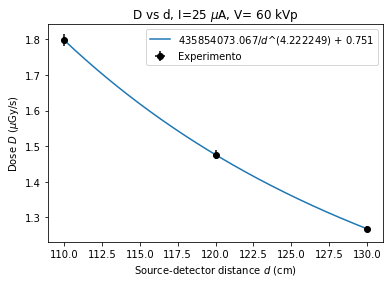

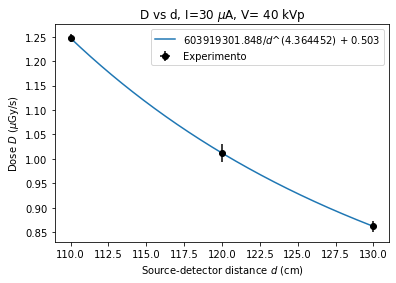

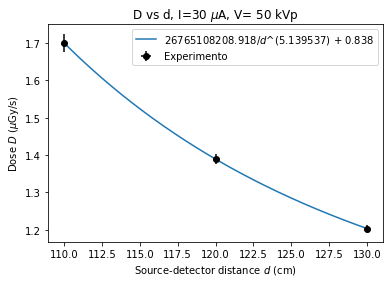

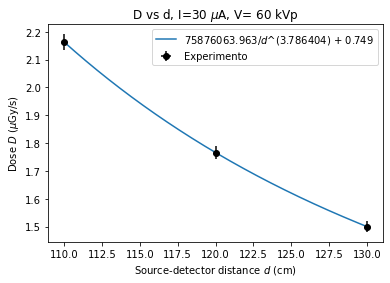

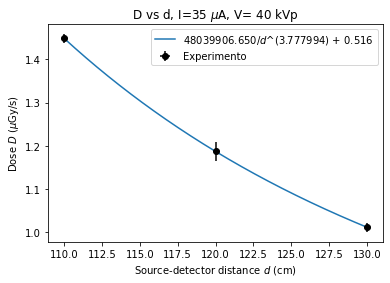

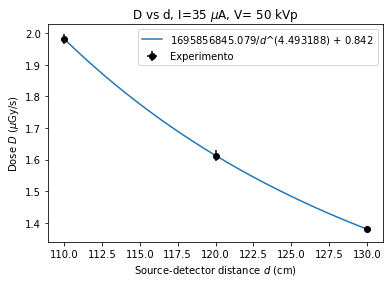

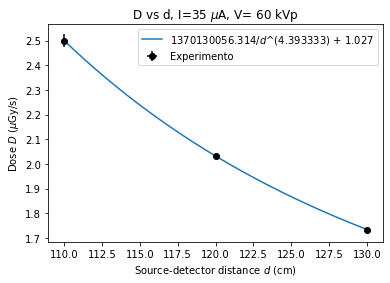

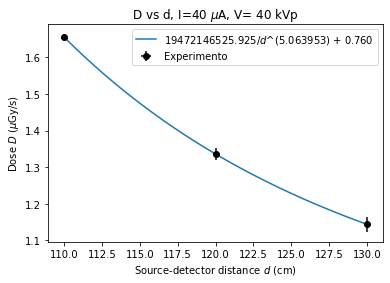

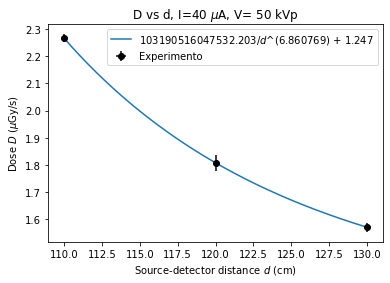

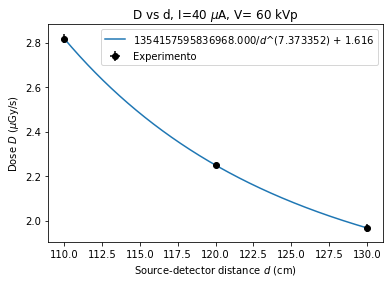

In [521]:
for elem in df_DvsdR:
    df = elem[0].to_numpy()
    V = elem[1]
    Ii = elem[2]
    D = df[:,0]
    d = df[:,1]
    Derr = df[:,2]
    dn = np.linspace(np.amin(d), np.amax(d), 1000)
    popt, pcov = curve_fit(coulomb2, d, D, maxfev=5000)
    plt.figure()
    #plt.plot(dn, coulomb(dn,*popt), label=r"{0}/$d^2$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.plot(dn, coulomb2(dn,*popt), label=r"{0}/$d$^({1}) + {2}".format( "{:.3f}".format(popt[0]), "{:.6f}".format(popt[1]), "{:.3f}".format(popt[2]) ) )
    plt.errorbar(d, D, xerr=0.05 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Source-detector distance $d$ (cm)")
    plt.ylabel(r"Dose $D$ ($\mu$Gy/s)")
    plt.title(r"D vs d, I={0} $\mu$A, V= {1} kVp".format(Ii,V))
    plt.legend()

# Gráfica de dosis vs voltaje de tubo(a distancias y corrientes fijas)

## Open Beam

In [529]:
df_DvsVOb = []

for d in dsOb:
    for i in I:
        df = dt_tot.loc[(dt_tot["Measure"] == "Openbeam") & (dt_tot["d"] == d) & (dt_tot["I"] == i), ["V", "Dmean", "Dstd"]]
        df_DvsVOb.append([df, d, i])

C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\1175860191.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


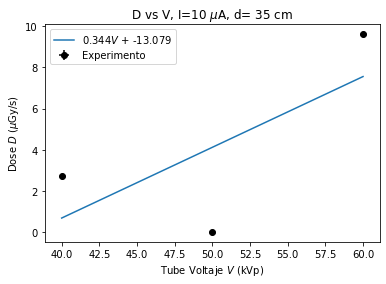

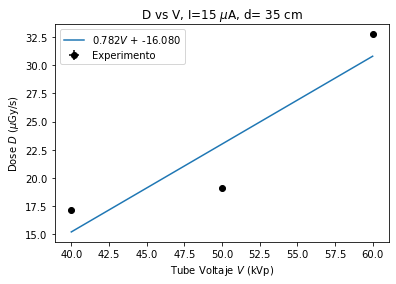

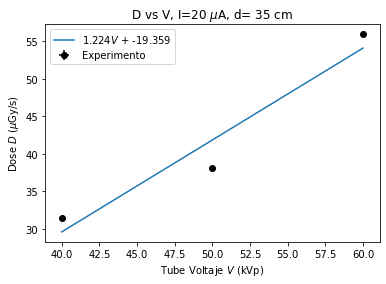

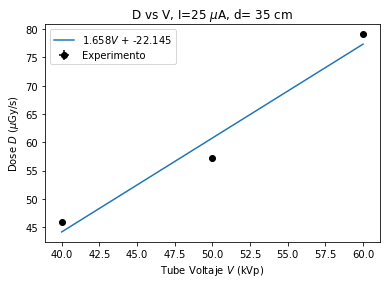

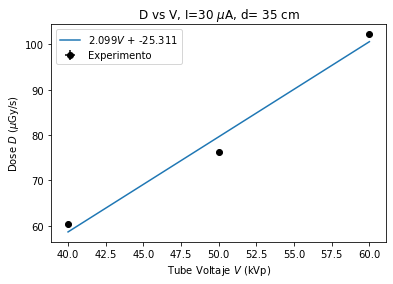

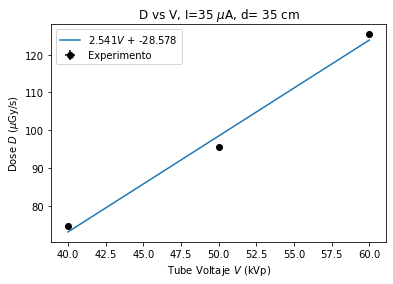

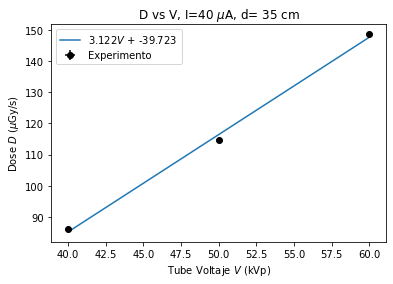

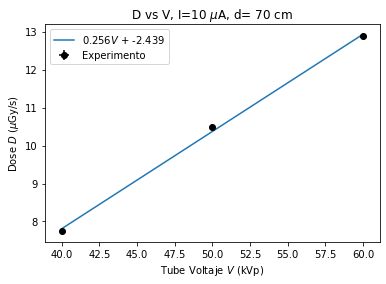

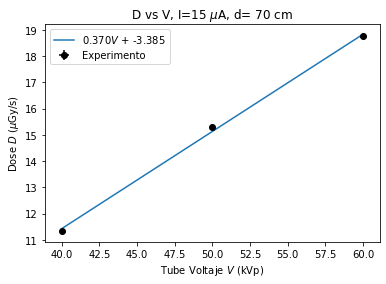

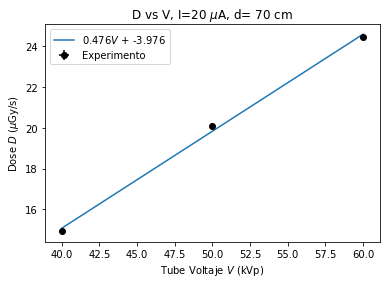

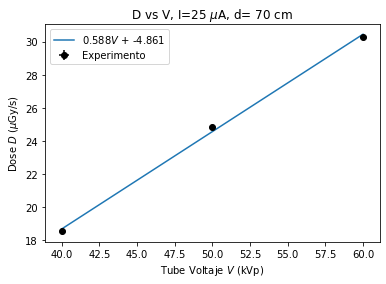

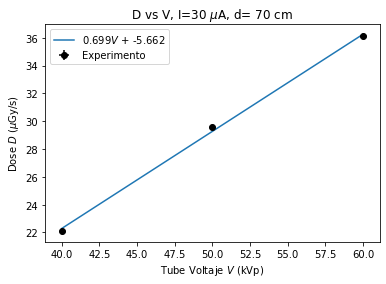

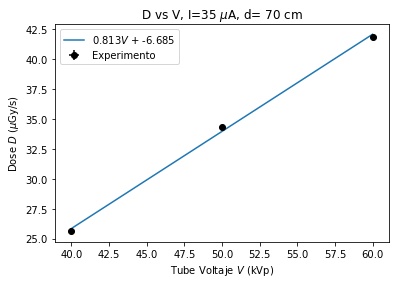

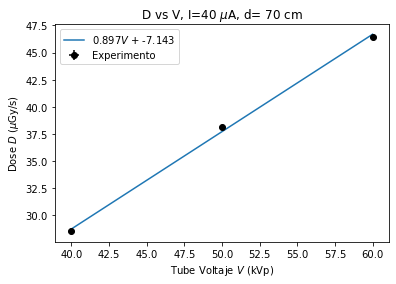

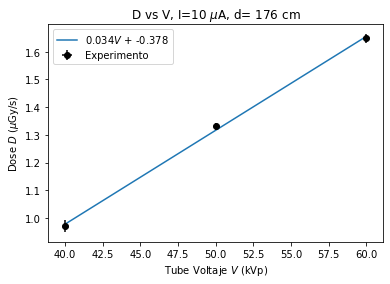

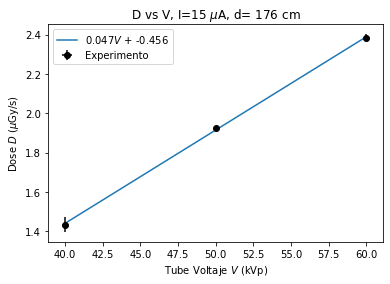

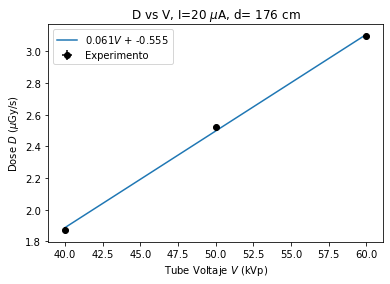

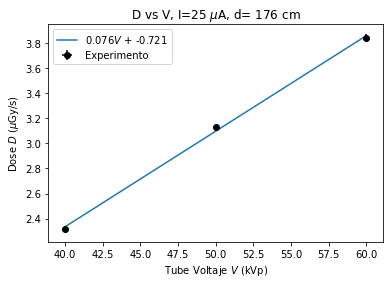

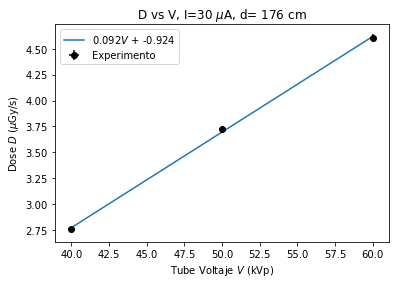

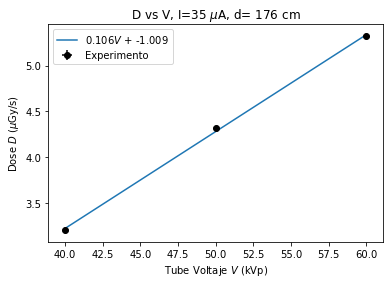

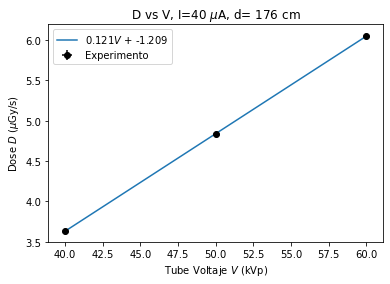

In [531]:
for elem in df_DvsVOb:
    df = elem[0].to_numpy()
    d = elem[1]
    Ii = elem[2]
    V = df[:,0]
    D = df[:,1]
    Derr = df[:,2]
    Vn = np.linspace(np.amin(V), np.amax(V), 1000)
    popt, pcov = curve_fit(line, V, D, maxfev=5000)
    plt.figure()
    plt.plot(Vn, line(Vn,*popt), label=r"{0}$V$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.errorbar(V, D, xerr=0.1 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Tube Voltaje $V$ (kVp)")
    plt.ylabel(r"Dose $D$ ($\mu$Gy/s)")
    plt.title(r"D vs V, I={0} $\mu$A, d= {1} cm".format(Ii,d))
    plt.legend()

## Rejilla

In [532]:
df_DvsVR = []

for d in dsR:
    for i in I:
        df = dt_tot.loc[(dt_tot["Measure"] == "Rejilla") & (dt_tot["d"] == d) & (dt_tot["I"] == i), ["V", "Dmean", "Dstd"]]
        df_DvsVR.append([df, d, i])

C:\Users\usuariohep\AppData\Local\Temp\ipykernel_23556\1176688506.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


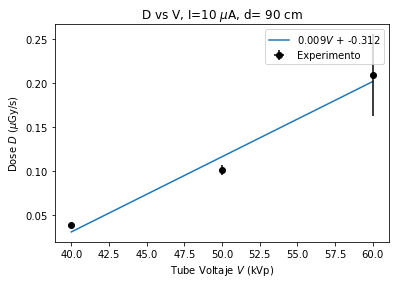

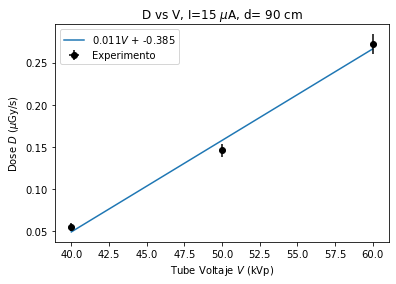

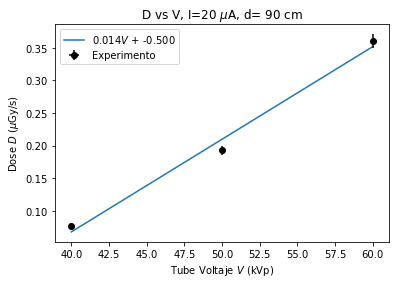

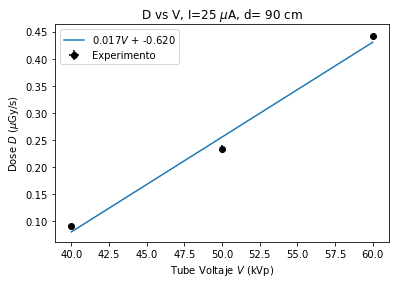

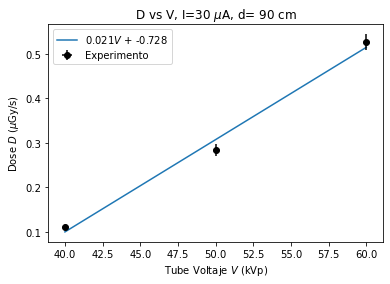

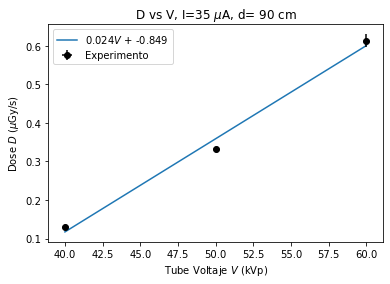

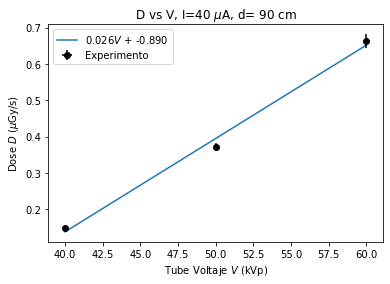

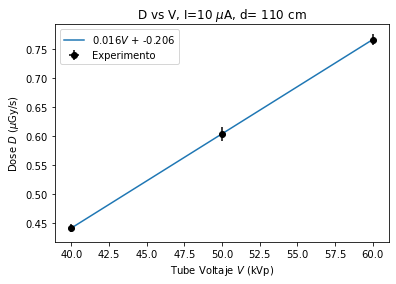

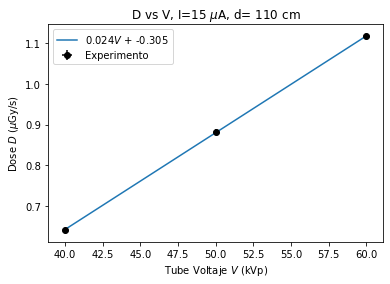

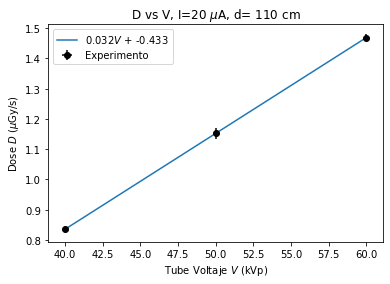

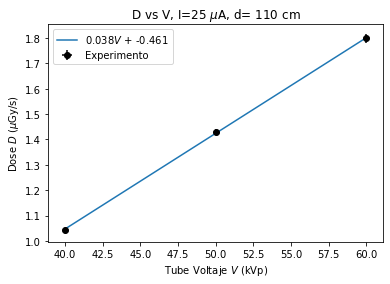

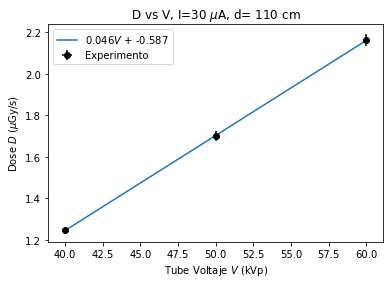

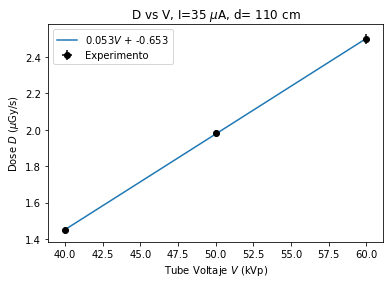

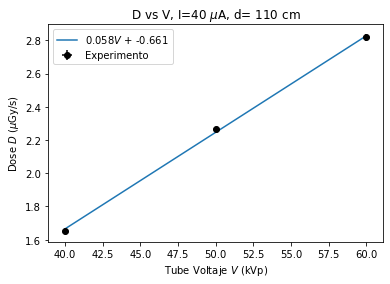

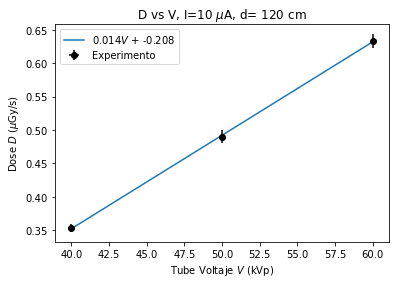

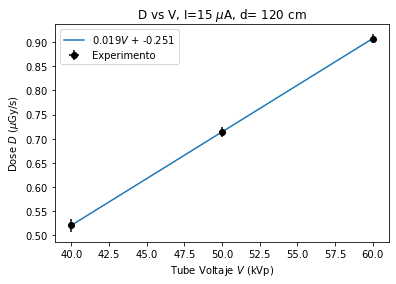

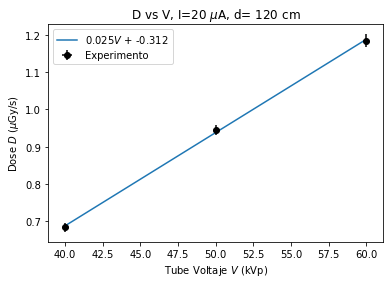

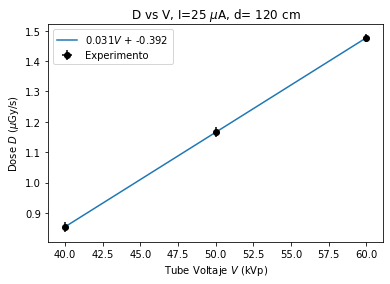

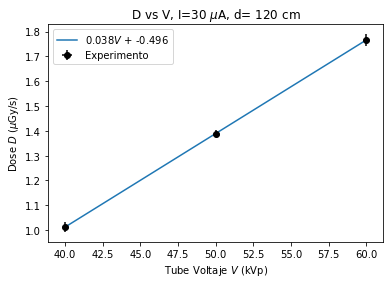

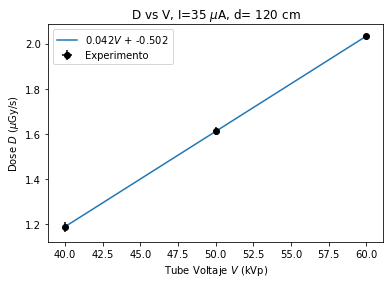

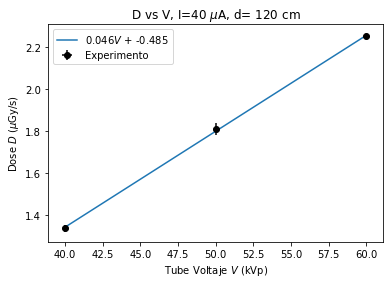

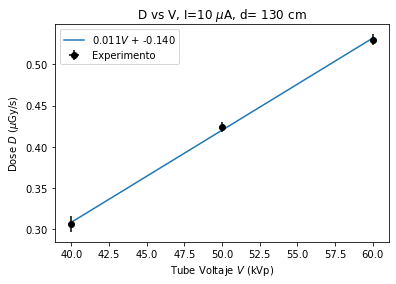

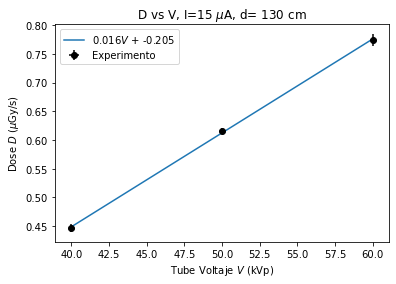

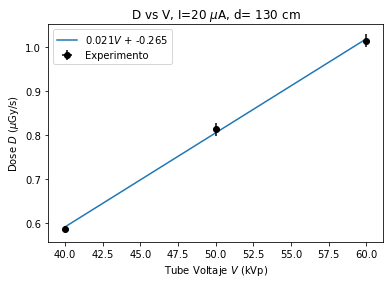

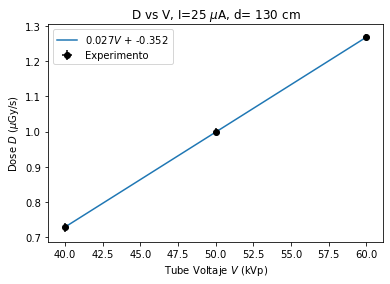

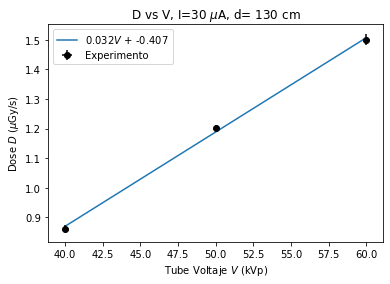

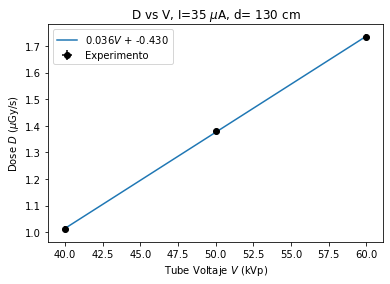

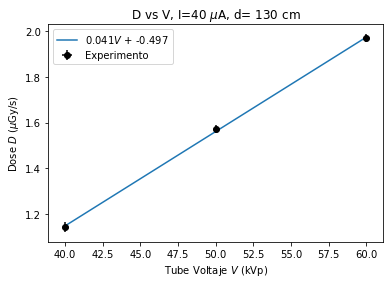

In [533]:
for elem in df_DvsVR:
    df = elem[0].to_numpy()
    d = elem[1]
    Ii = elem[2]
    V = df[:,0]
    D = df[:,1]
    Derr = df[:,2]
    Vn = np.linspace(np.amin(V), np.amax(V), 1000)
    popt, pcov = curve_fit(line, V, D, maxfev=5000)
    plt.figure()
    plt.plot(Vn, line(Vn,*popt), label=r"{0}$V$ + {1}".format( "{:.3f}".format(popt[0]), "{:.3f}".format(popt[1]) ) )
    plt.errorbar(V, D, xerr=0.1 ,yerr=Derr, label="Experimento", color="black", marker="o", linestyle="None")
    plt.xlabel(r"Tube Voltaje $V$ (kVp)")
    plt.ylabel(r"Dose $D$ ($\mu$Gy/s)")
    plt.title(r"D vs V, I={0} $\mu$A, d= {1} cm".format(Ii,d))
    plt.legend()